In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl

In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 3,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )


In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19').date()
FOA_END_DATE = dt.fromisoformat('2022-04-30').date()
FUND_START_DATE = dt.fromisoformat('2022-05-01').date()
FUND_END_DATE = dt.fromisoformat('2023-02-28').date()

# Load Bitcoin Price Data (glassnode.com)

In [4]:
df = pd.read_csv('bitcoin-price-usd-2023-02-28.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.rename(columns={'value': 'Bitcoin'}, inplace=True)
df['Date'] = df.timestamp.dt.date
df.index = df.timestamp.dt.date
df.dtypes

timestamp    datetime64[ns, UTC]
Bitcoin                  float64
Date                      object
dtype: object

# Load MVRV Price Data (glassnode.com)

In [5]:
tempdf = pd.read_csv('bitcoin-mvrv-z-score.csv')
tempdf.timestamp = pd.to_datetime(tempdf.timestamp)
tempdf.rename(columns={'value': 'MVRV Z-Score'}, inplace=True)
tempdf['Date'] = tempdf.timestamp.dt.date
tempdf.index = tempdf.timestamp.dt.date
tempdf.dtypes

timestamp       datetime64[ns, UTC]
MVRV Z-Score                float64
Date                         object
dtype: object

In [6]:
merged_df = pd.merge(df, tempdf, how='inner', on='Date')
merged_df

,timestamp_x,Bitcoin,Date,timestamp_y,MVRV Z-Score
0,2010-07-17 00:00:00+00:00,0.0495,2010-07-17,2010-07-17 00:00:00+00:00,-0.0000
1,2010-07-18 00:00:00+00:00,0.0858,2010-07-18,2010-07-18 00:00:00+00:00,2.5181
2,2010-07-19 00:00:00+00:00,0.0808,2010-07-19,2010-07-19 00:00:00+00:00,2.0970
3,2010-07-20 00:00:00+00:00,0.0747,2010-07-20,2010-07-20 00:00:00+00:00,1.6515
4,2010-07-21 00:00:00+00:00,0.0792,2010-07-21,2010-07-21 00:00:00+00:00,1.9270
...,...,...,...,...,...
4557,2023-01-07 00:00:00+00:00,"16,950.8882",2023-01-07,2023-01-07 00:00:00+00:00,-0.2057
4558,2023-01-08 00:00:00+00:00,"17,057.2245",2023-01-08,2023-01-08 00:00:00+00:00,-0.1980
4559,2023-01-09 00:00:00+00:00,"17,190.7097",2023-01-09,2023-01-09 00:00:00+00:00,-0.1871
4560,2023-01-10 00:00:00+00:00,"17,437.1072",2023-01-10,2023-01-10 00:00:00+00:00,-0.1690


In [7]:
df = merged_df[['Date', 'Bitcoin', 'MVRV Z-Score']]
df.index = df.Date
df

,Date,Bitcoin,MVRV Z-Score
Date,,,
2010-07-17,2010-07-17,0.0495,-0.0000
2010-07-18,2010-07-18,0.0858,2.5181
2010-07-19,2010-07-19,0.0808,2.0970
2010-07-20,2010-07-20,0.0747,1.6515
2010-07-21,2010-07-21,0.0792,1.9270
...,...,...,...
2023-01-07,2023-01-07,"16,950.8882",-0.2057
2023-01-08,2023-01-08,"17,057.2245",-0.1980
2023-01-09,2023-01-09,"17,190.7097",-0.1871


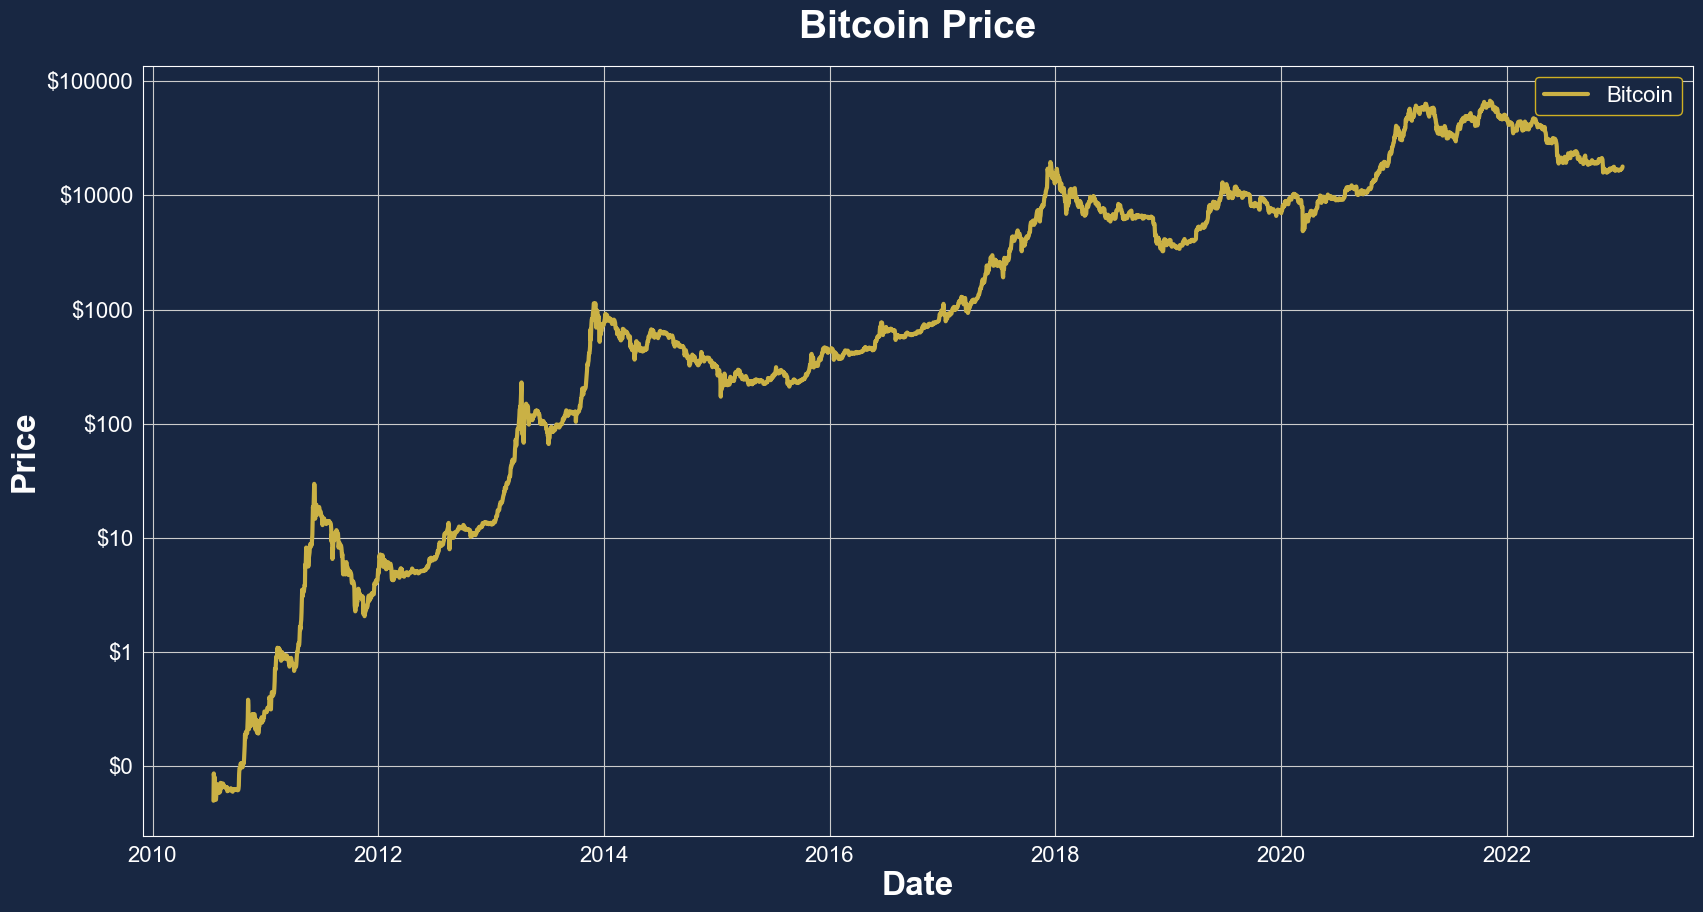

In [8]:
ax = df[['Bitcoin']].plot(figsize=(20, 10), title='Bitcoin Price', logy=True, color={'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
# ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('bitcoin_price.pdf', format='pdf')


# 200 Week SMA Chart

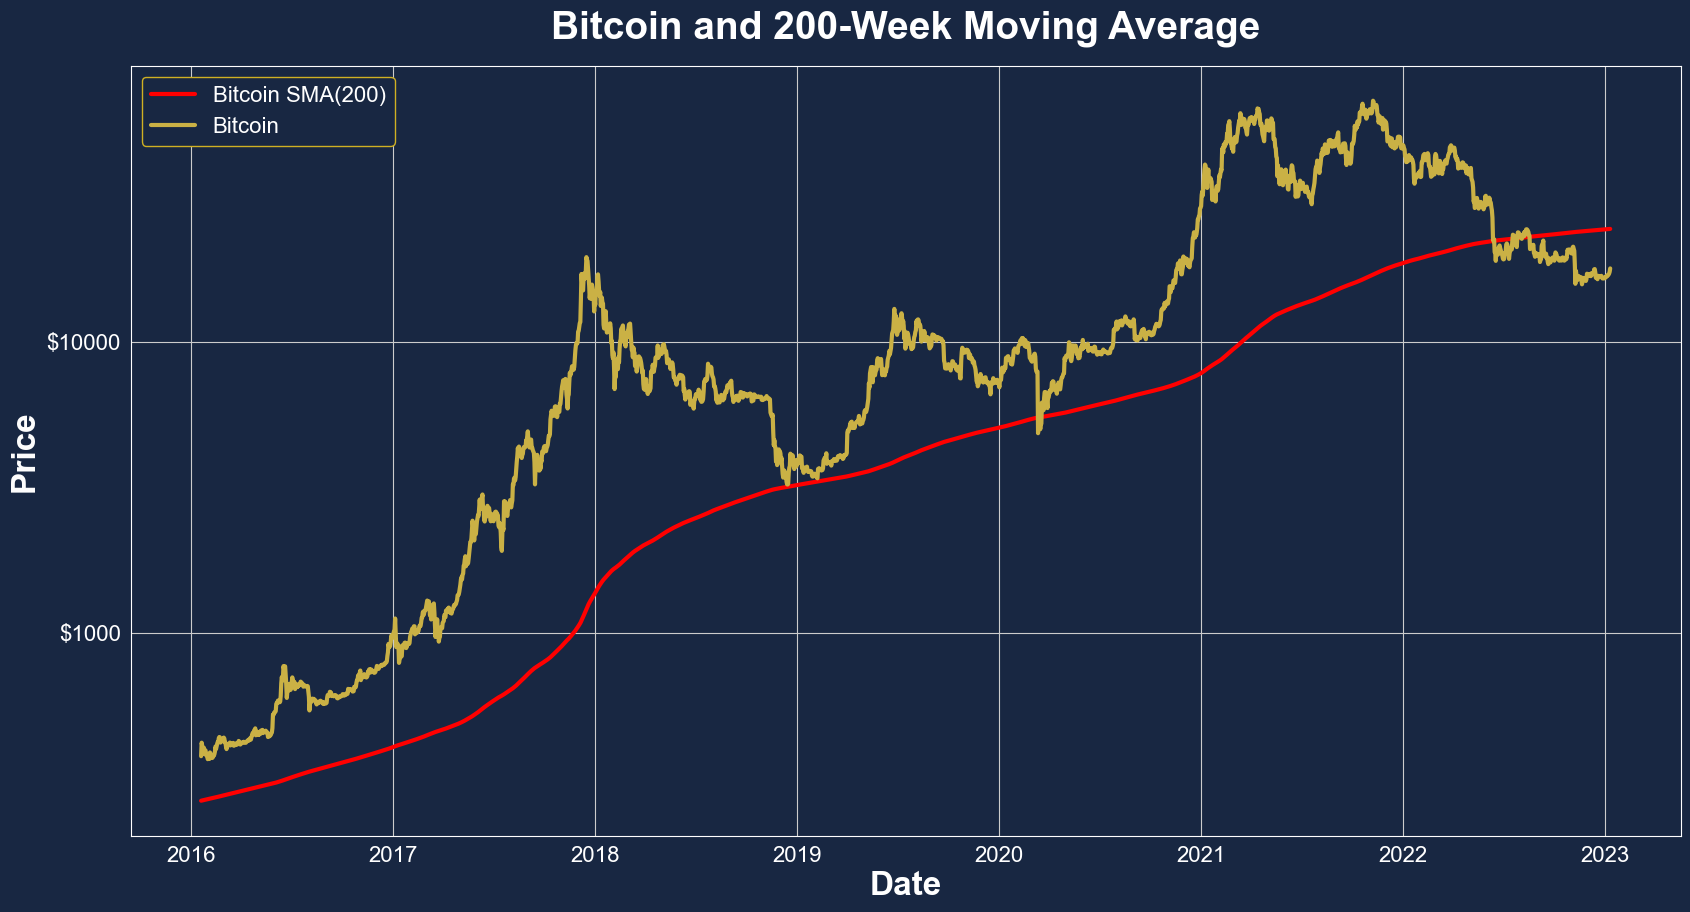

In [9]:
sample_start = FOA_START_DATE - timedelta(days=1400)
sample = df[sample_start:FUND_END_DATE].copy()
sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['Bitcoin SMA(200)', 'Bitcoin']].plot.line(figsize=(20, 10), title='Bitcoin and 200-Week Moving Average', logy=True, color={'Bitcoin SMA(200)': 'red', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
# ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-btc-sma-200.pdf', format='pdf')
sample[['Bitcoin SMA(200)', 'Bitcoin']].to_csv('bitcoin-weeky-sma-200.csv')

# MVRV Z-Score Index

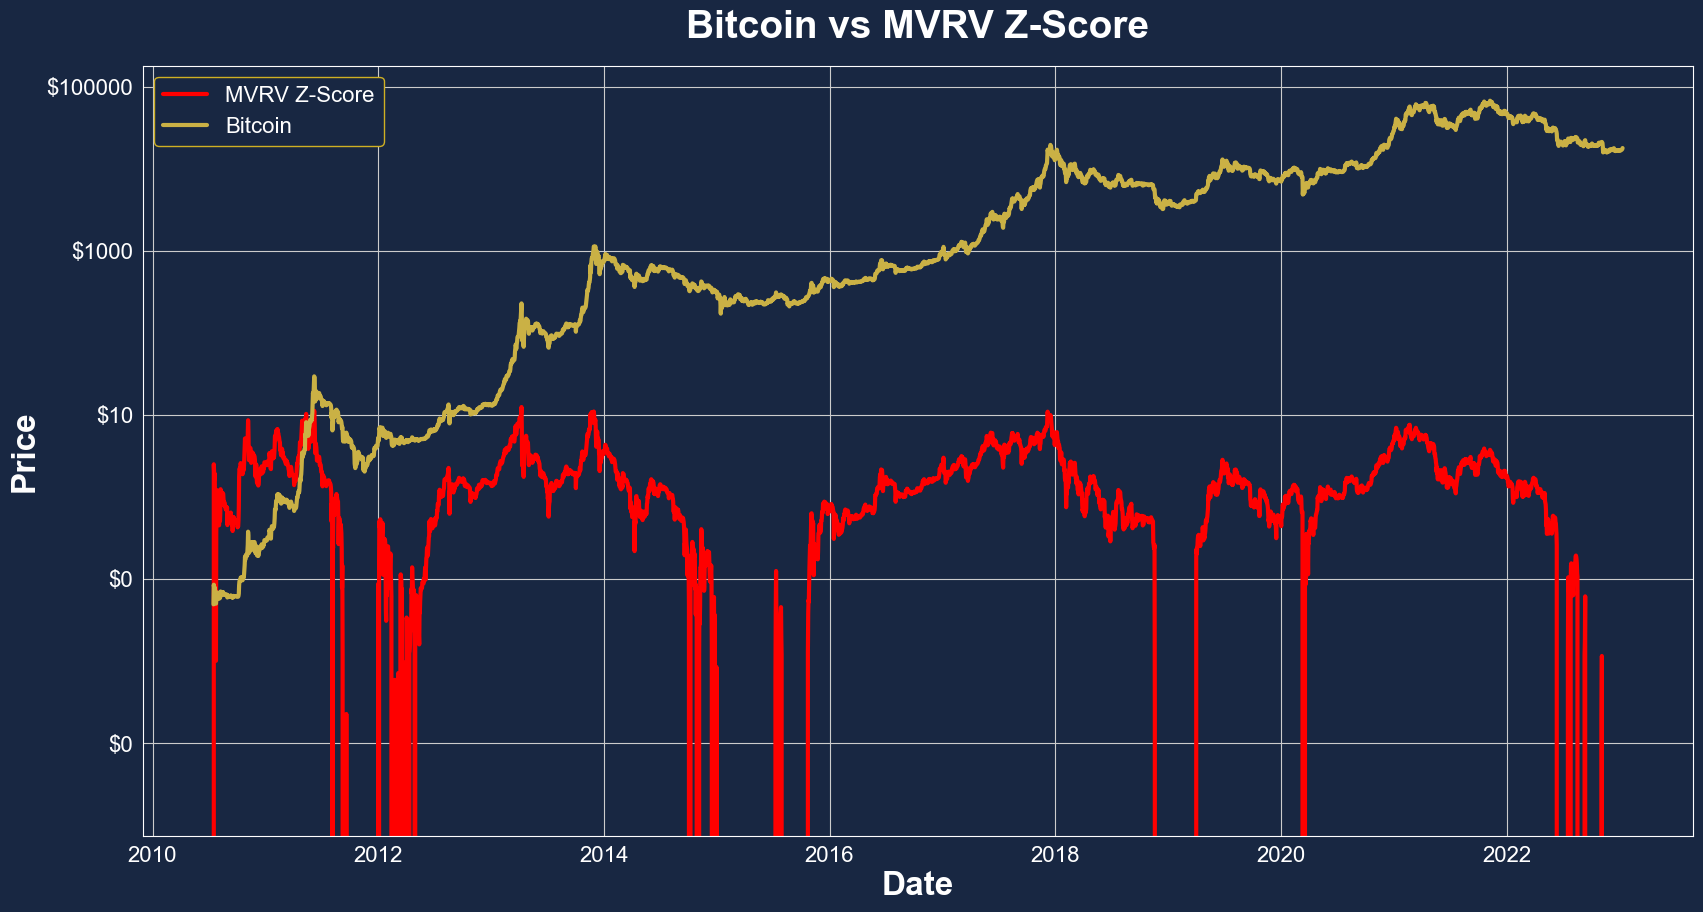

In [10]:
sample_start = FOA_START_DATE 
sample = df[:FUND_END_DATE].copy()
# sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['MVRV Z-Score', 'Bitcoin']].plot.line(figsize=(20, 10), title='Bitcoin vs MVRV Z-Score', logy=True, color={'MVRV Z-Score': 'red', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
# ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-mvrv-z-score.pdf', format='pdf')
sample[['MVRV Z-Score', 'Bitcoin']].to_csv('mvrv-z-score.csv')

In [11]:
sample

,Date,Bitcoin,MVRV Z-Score
Date,,,
2010-07-17,2010-07-17,0.0495,-0.0000
2010-07-18,2010-07-18,0.0858,2.5181
2010-07-19,2010-07-19,0.0808,2.0970
2010-07-20,2010-07-20,0.0747,1.6515
2010-07-21,2010-07-21,0.0792,1.9270
...,...,...,...
2023-01-07,2023-01-07,"16,950.8882",-0.2057
2023-01-08,2023-01-08,"17,057.2245",-0.1980
2023-01-09,2023-01-09,"17,190.7097",-0.1871
